## 04-1 데이터 시각화가 필요한 이유
### 앤스콤 4분할 그래프 살펴보기

In [3]:
#앤스콤 데이터 집합 불러오기
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [4]:
#matplotlib 라이브러리로 그래프 그리기
%matplotlib notebook
import matplotlib.pyplot as plt

In [5]:
#dataset 열에서 데이터 값이 I인 것만 추출
dataset_1 = anscombe[anscombe['dataset'] == 'I']

<IPython.core.display.Javascript object>


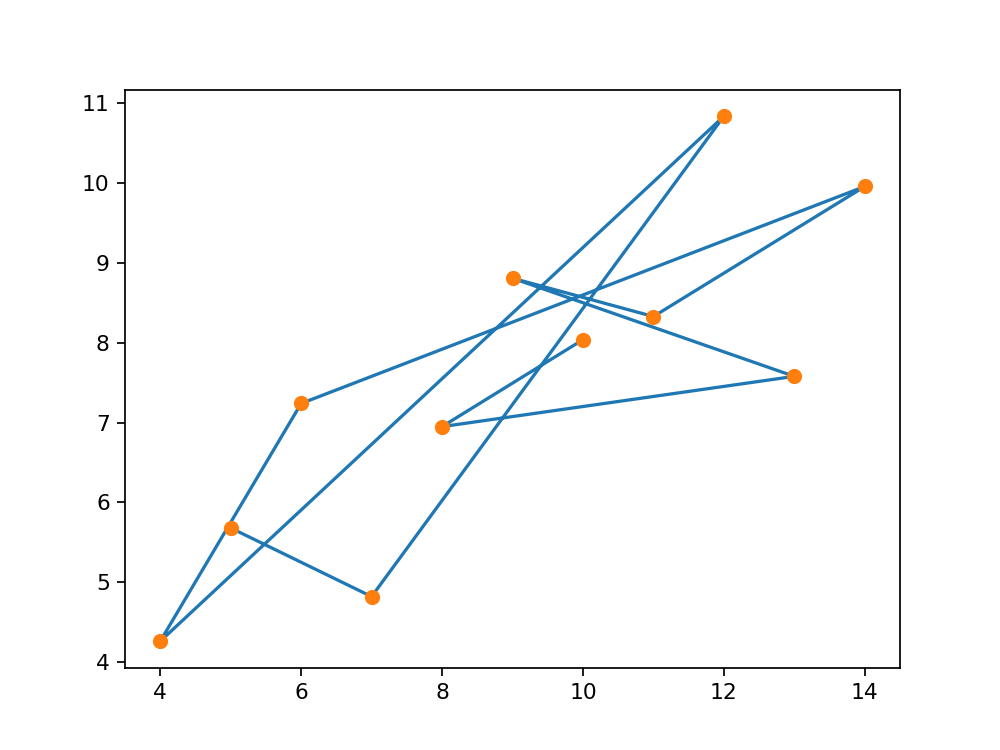

In [6]:
plt.plot(dataset_1['x'], dataset_1['y'])

In [7]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

### 앤스콤 데이터 집합 모두 사용해 그래프 만들기

In [8]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

<IPython.core.display.Javascript object>


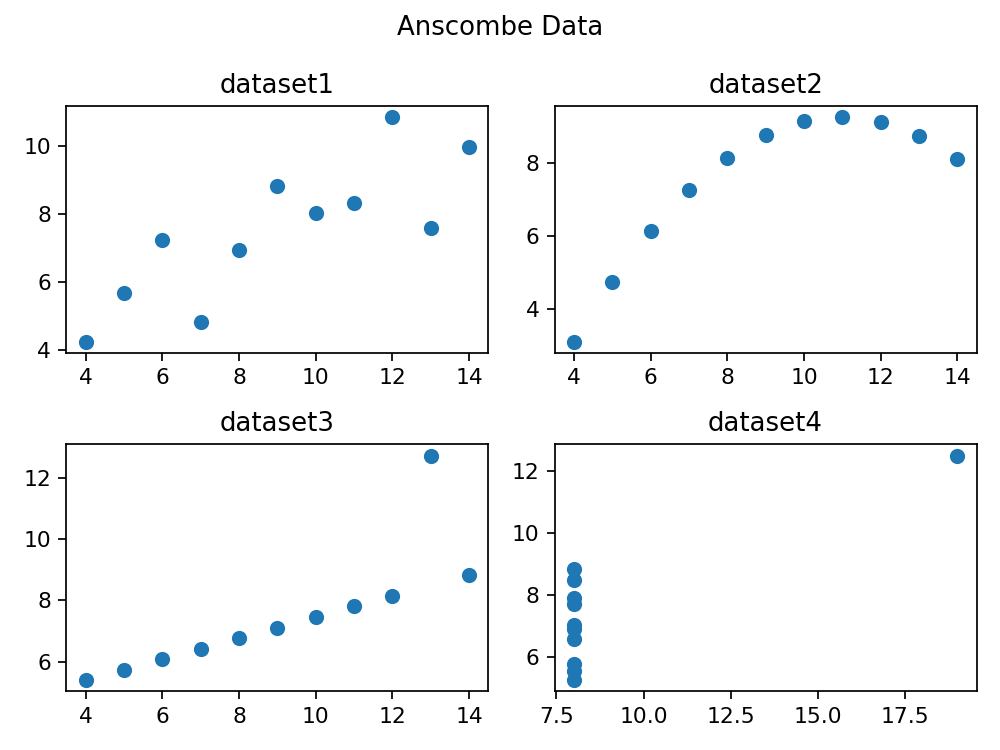

In [9]:
# 기본 틀(fig)
fig = plt.figure()

In [10]:
#그래프 격자 그리기: fig.add_subplot(행 크기, 열 크기)
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

In [11]:
#각 격자에 그래프 그리기: axes.plot([x], [y], 'o')
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

In [13]:
#그래프 격자에 제목 추가: axes.set_title("이름")
axes1.set_title("dataset1")
axes2.set_title("dataset2")
axes3.set_title("dataset3")
axes4.set_title("dataset4")

Text(0.5, 1.0, 'dataset4')

In [14]:
#기본 틀(fig) 제목 추가: fig.suptitle("이름")
fig.suptitle("Anscombe Data")

Text(0.5, 0.98, 'Anscombe Data')

In [15]:
#그래프 레이아웃 조절: fig.tight_layout()
fig.tight_layout()

## 04-2 matplotlib 라이브러리 자유자재로 사용하기
### 기초 그래프 그리기

In [16]:
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


#### 히스토그램(일변량 그래프)

<IPython.core.display.Javascript object>


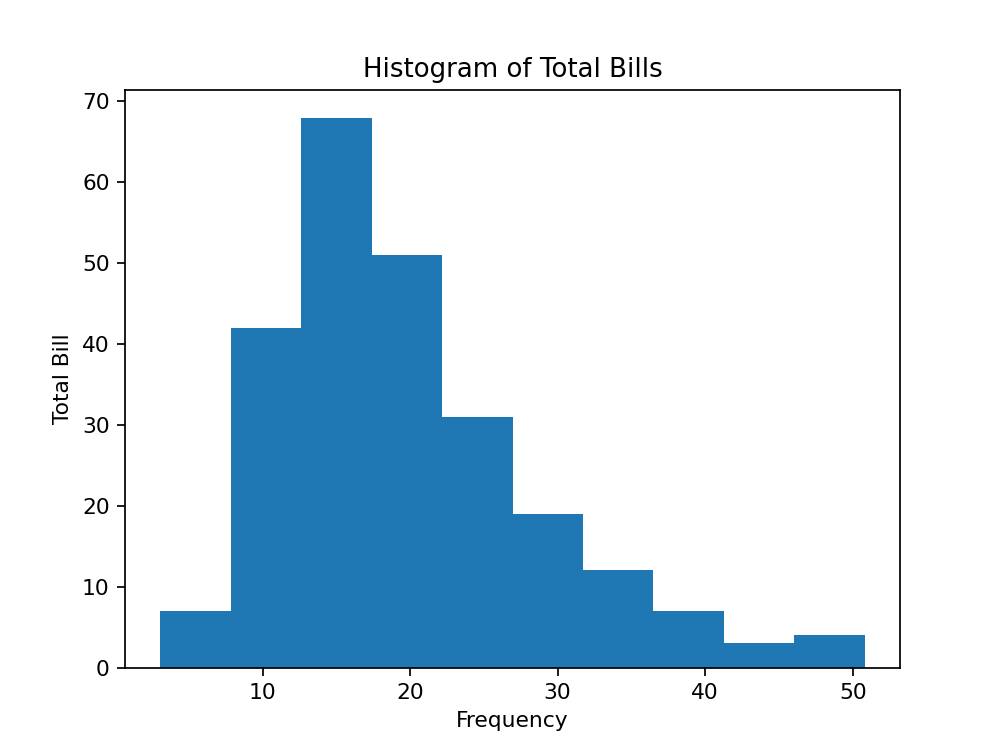

In [18]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

In [19]:
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title("Histogram of Total Bills")
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

Text(66.37847222222221, 0.5, 'Total Bill')

#### 산점도(이변량 그래프)

<IPython.core.display.Javascript object>


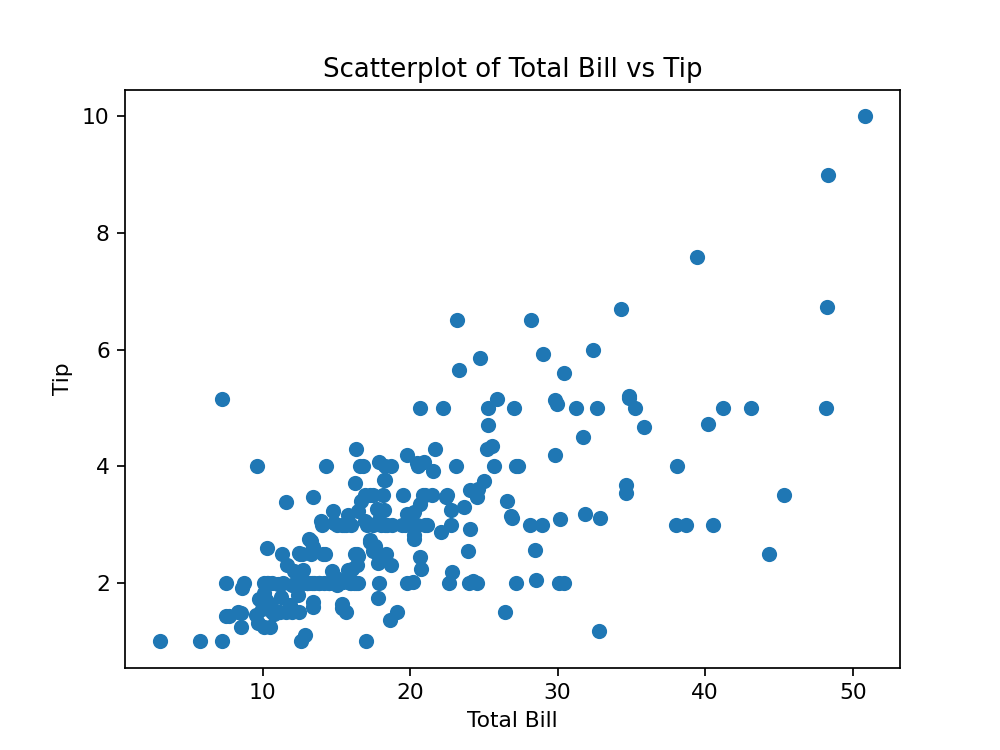

Text(0, 0.5, 'Tip')

In [22]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

#### 박스 그래프

<IPython.core.display.Javascript object>


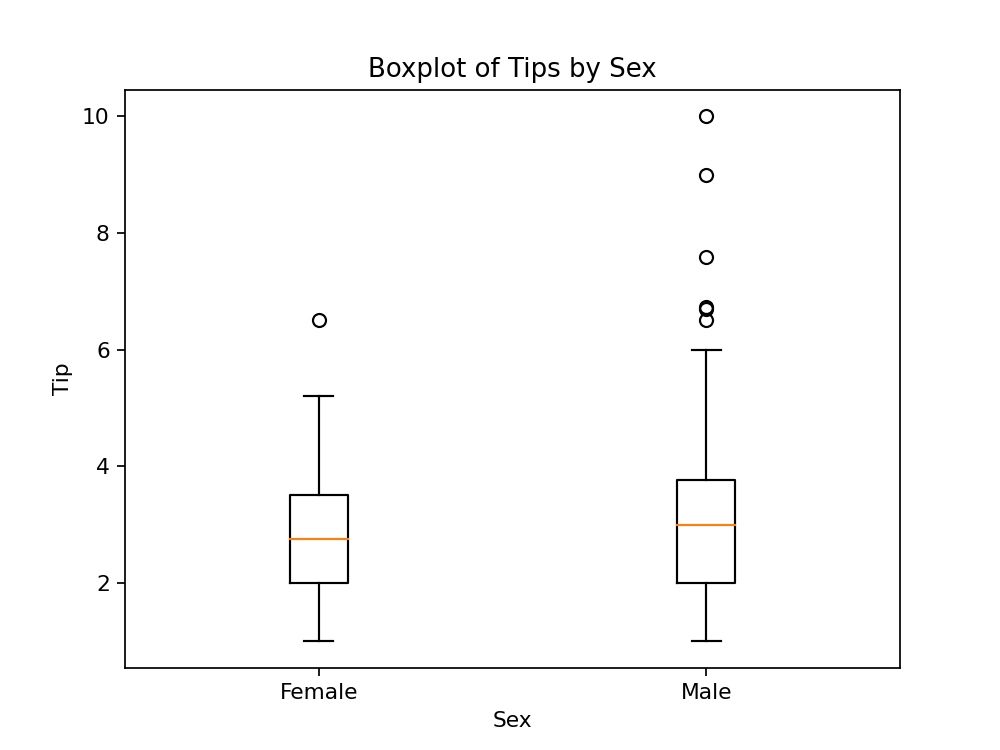

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

In [23]:
#성별이 F인 데이터와 M인 데이터에서 tip 열 데이터만 추출
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
             labels = ['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

### 다변량 그래프 그리기

In [24]:
#문자열을 정수로 치환하는 함수
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

In [25]:
#sex_color 열 추가
tips['sex_color'] = tips['sex'].apply(recode_sex)

<IPython.core.display.Javascript object>


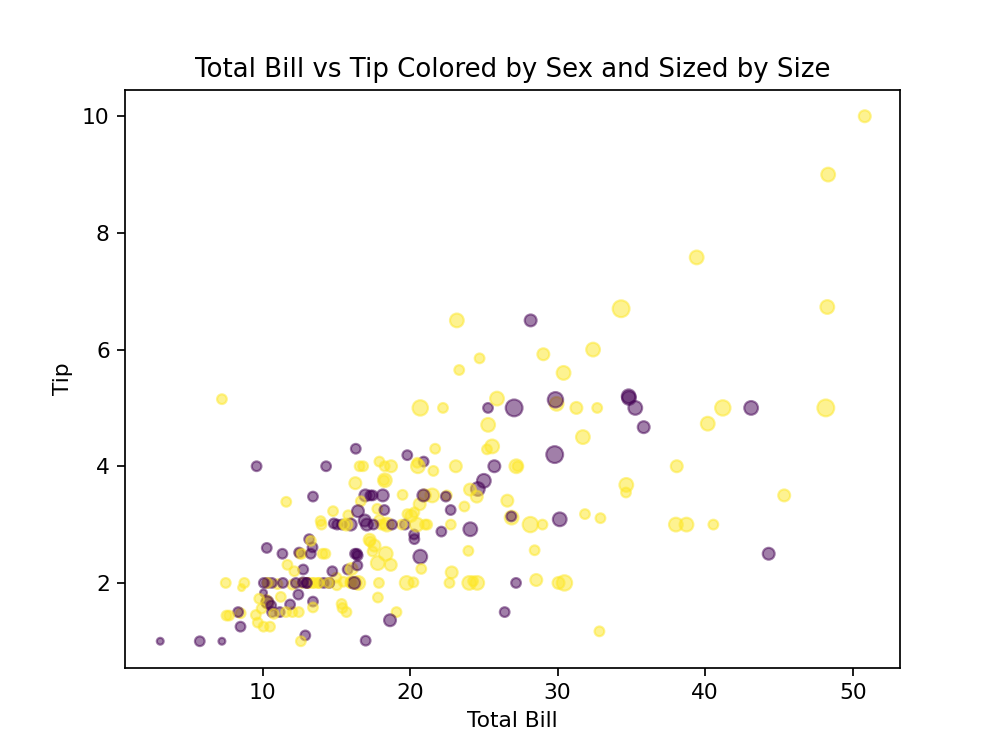

Text(0, 0.5, 'Tip')

In [26]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(x=tips['total_bill'],
             y=tips['tip'],
             s=tips['size']*10,
             c=tips['sex_color'],
             alpha=0.5)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 04-3 seaborn 라이브러리 자유자재로 사용하기

In [27]:
import seaborn as sns
tips = sns.load_dataset("tips")

<IPython.core.display.Javascript object>


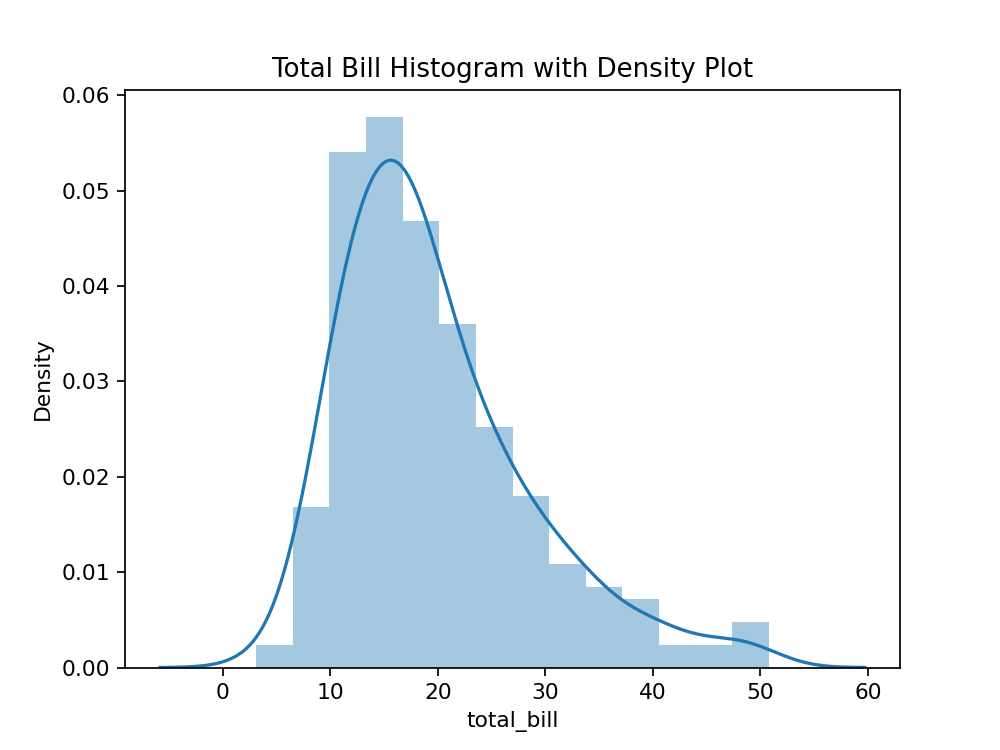

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

In [30]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')
#경고 메시지는 메서드 사용 방법이 바뀜을 나타냄

<IPython.core.display.Javascript object>


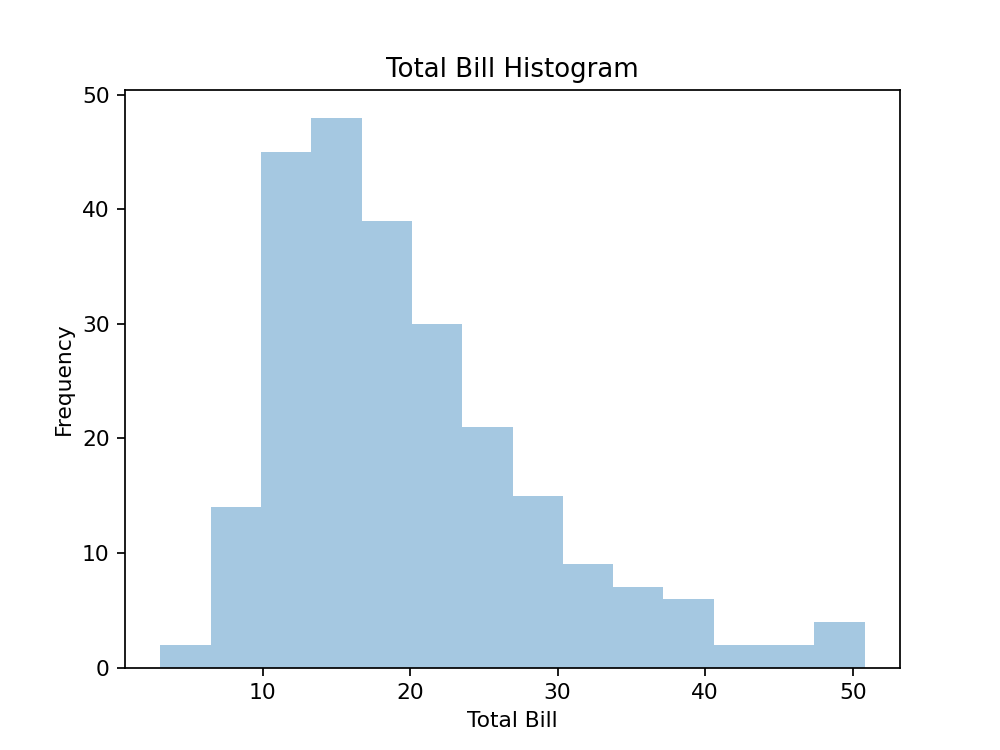

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

In [31]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

<IPython.core.display.Javascript object>


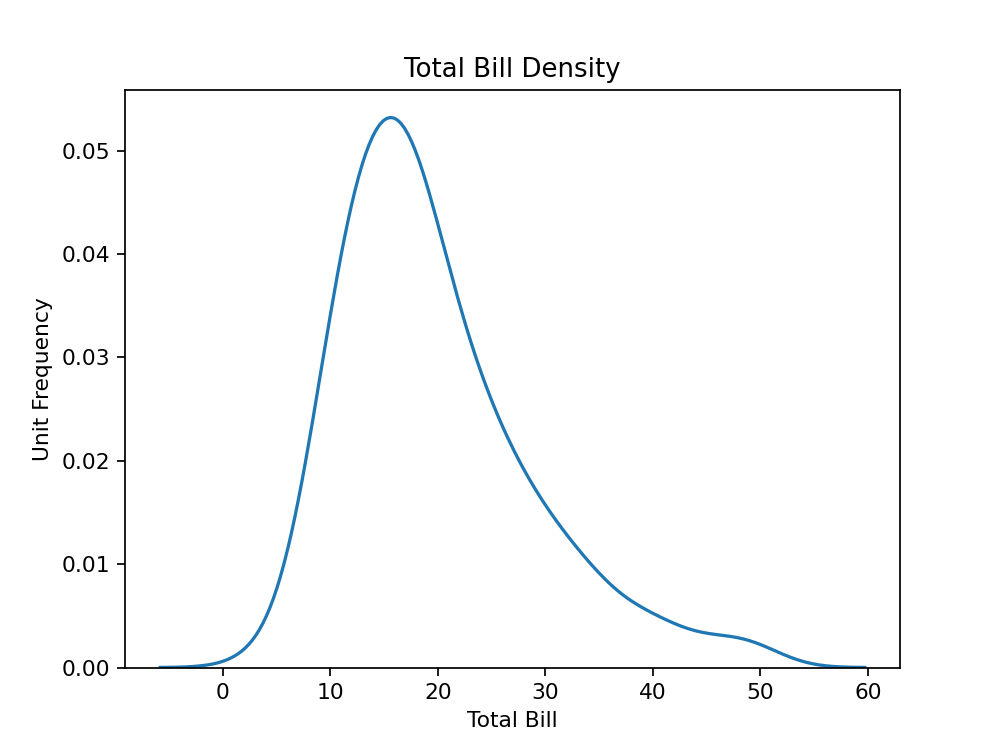

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Frequency')

In [32]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Frequency')

<IPython.core.display.Javascript object>


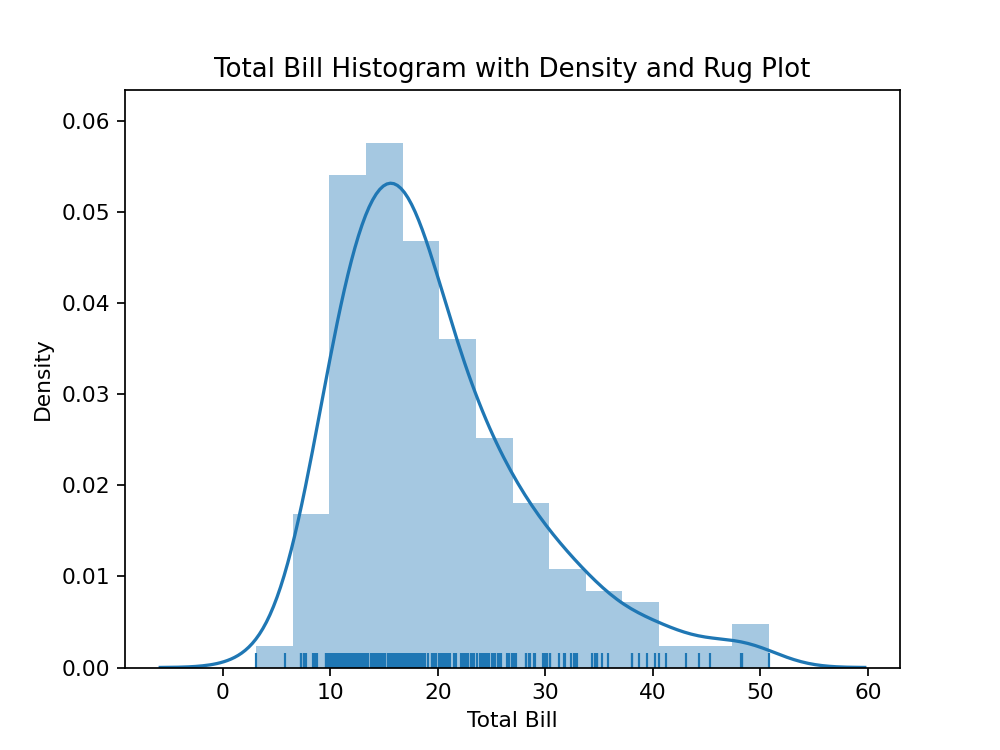

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

In [33]:
#rug인자: 그래프의 축에 동일한 길이의 직선을 붙여 데이터의 밀집 정도 표현
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

<IPython.core.display.Javascript object>


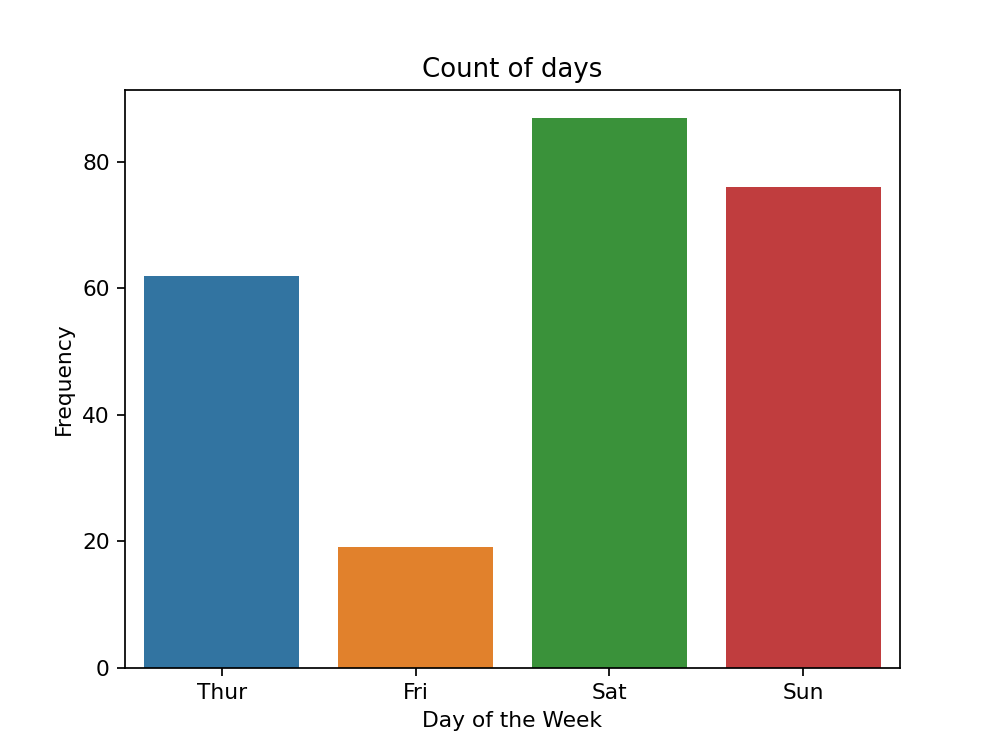

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

In [34]:
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

<IPython.core.display.Javascript object>


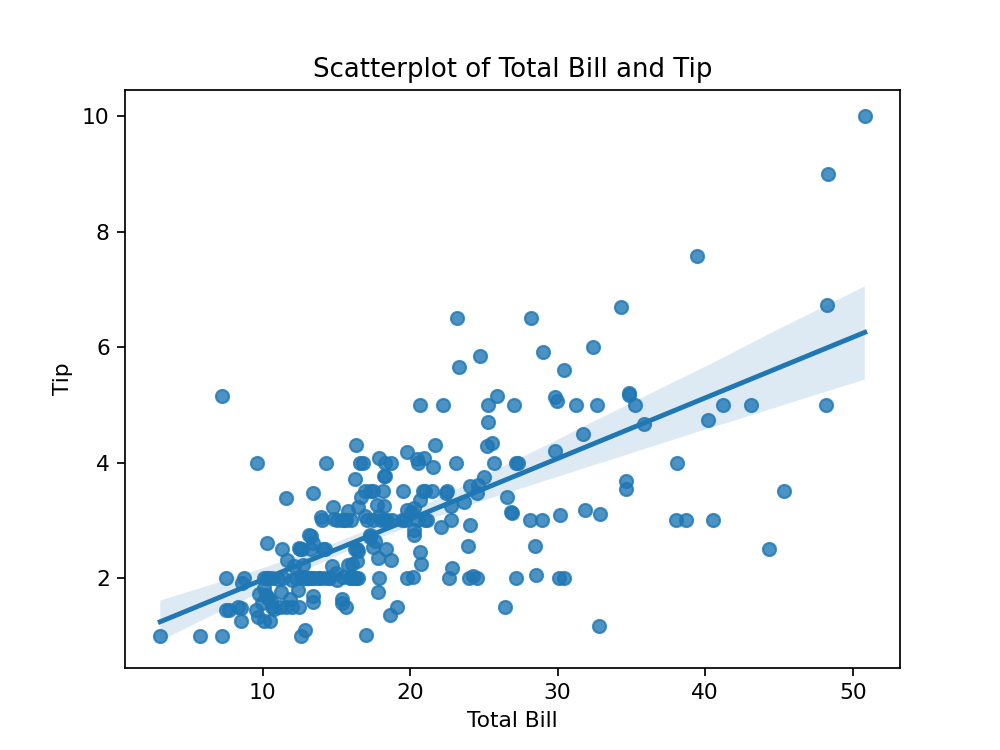

Text(0, 0.5, 'Tip')

In [36]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

<IPython.core.display.Javascript object>


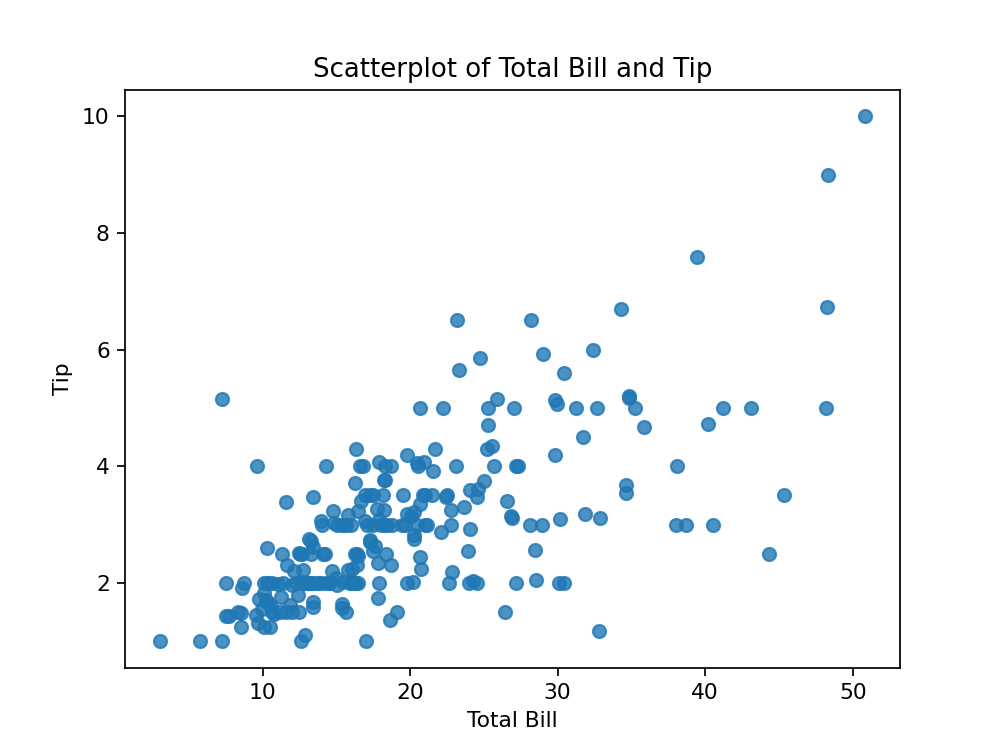

Text(0, 0.5, 'Tip')

In [37]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

<IPython.core.display.Javascript object>


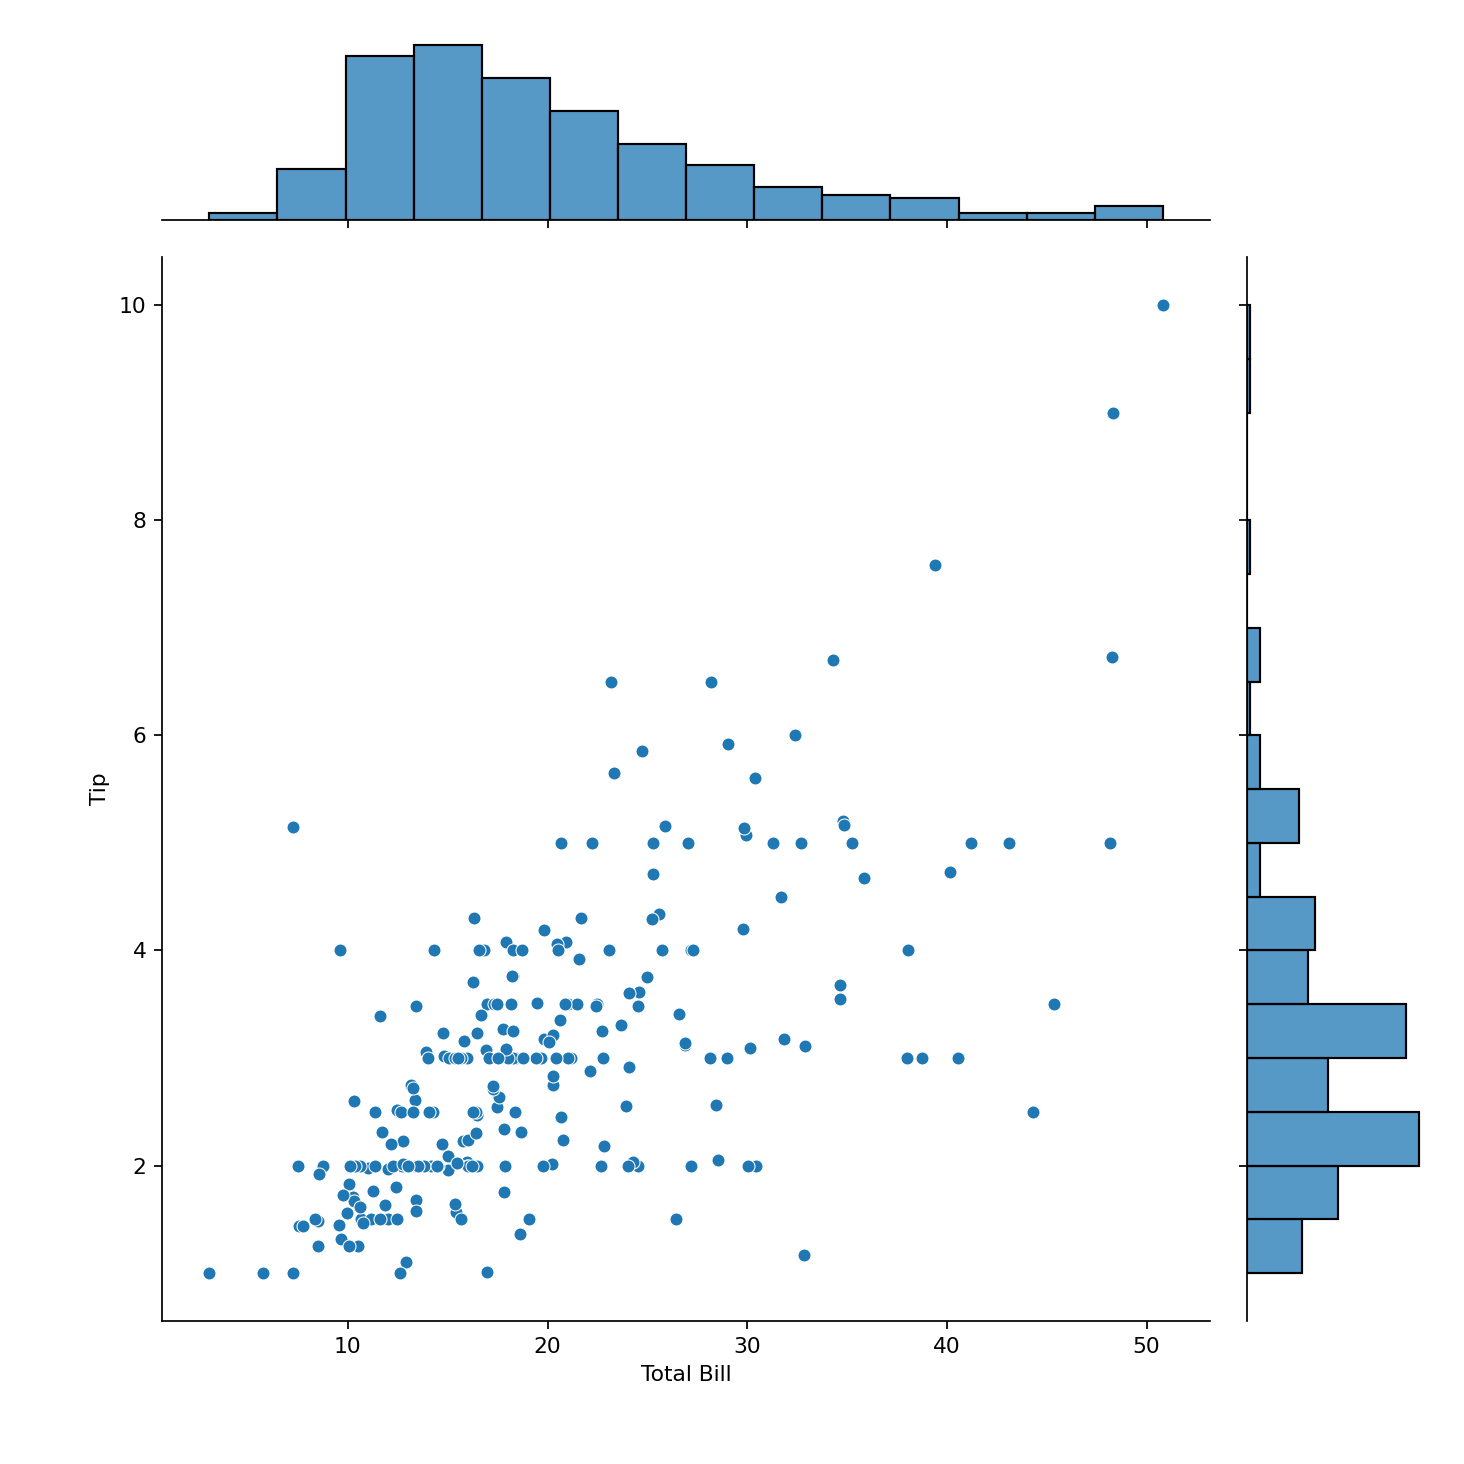

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

In [39]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

<IPython.core.display.Javascript object>


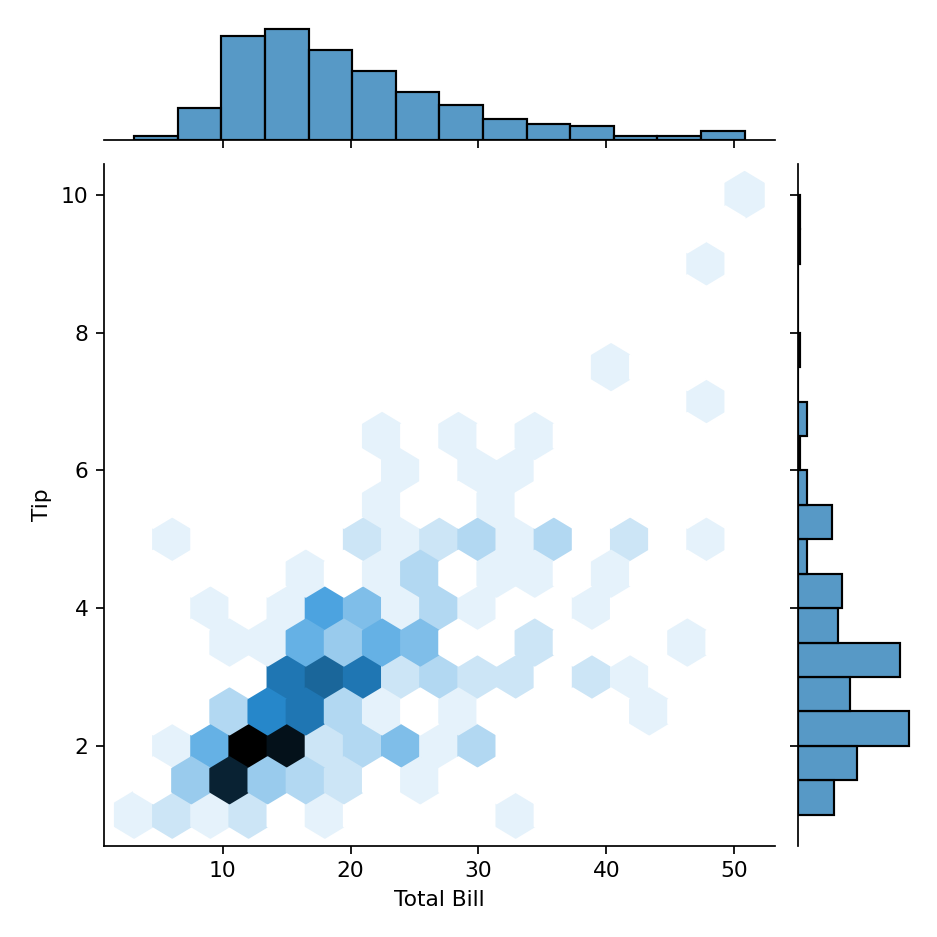

Text(0.5, 1.03, 'Hexbin Plot of Total Bill and Tip')

In [40]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind="hex")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Plot of Total Bill and Tip', fontsize=10, y=1.03)

<IPython.core.display.Javascript object>


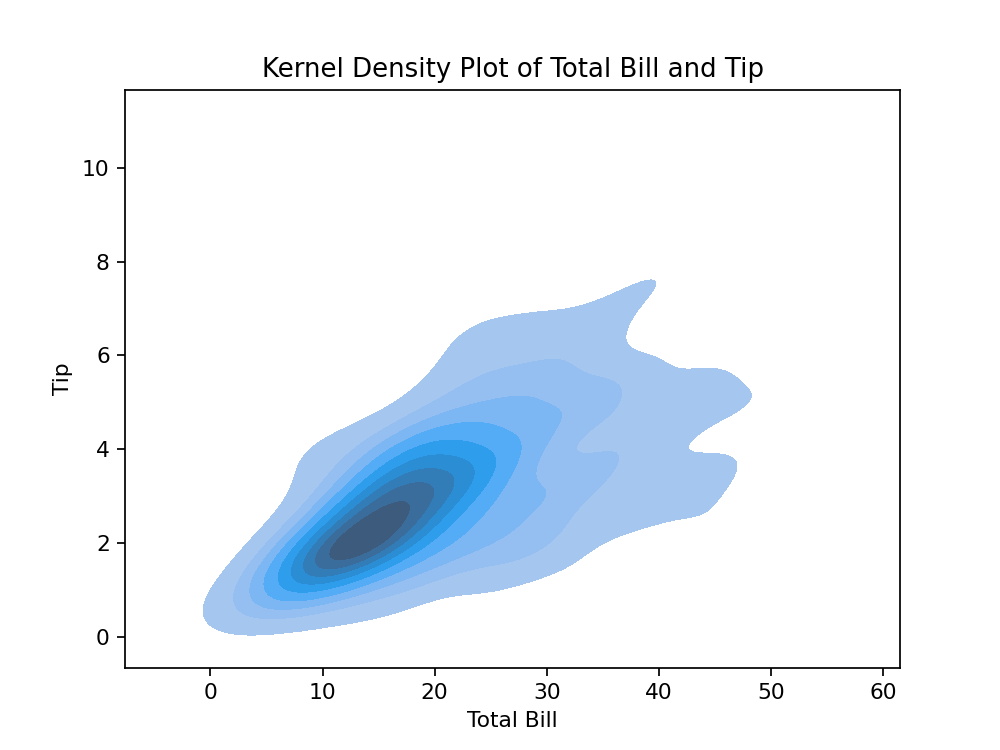

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

In [41]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                data2=tips['tip'],
                shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

<IPython.core.display.Javascript object>


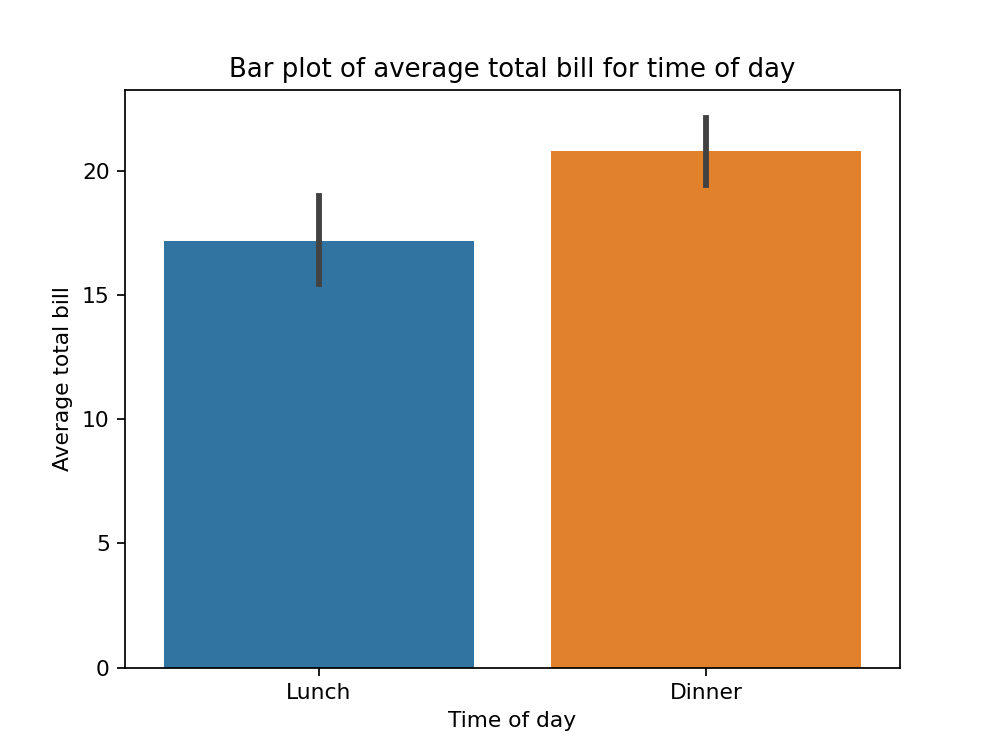

Text(0, 0.5, 'Average total bill')

In [42]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

<IPython.core.display.Javascript object>


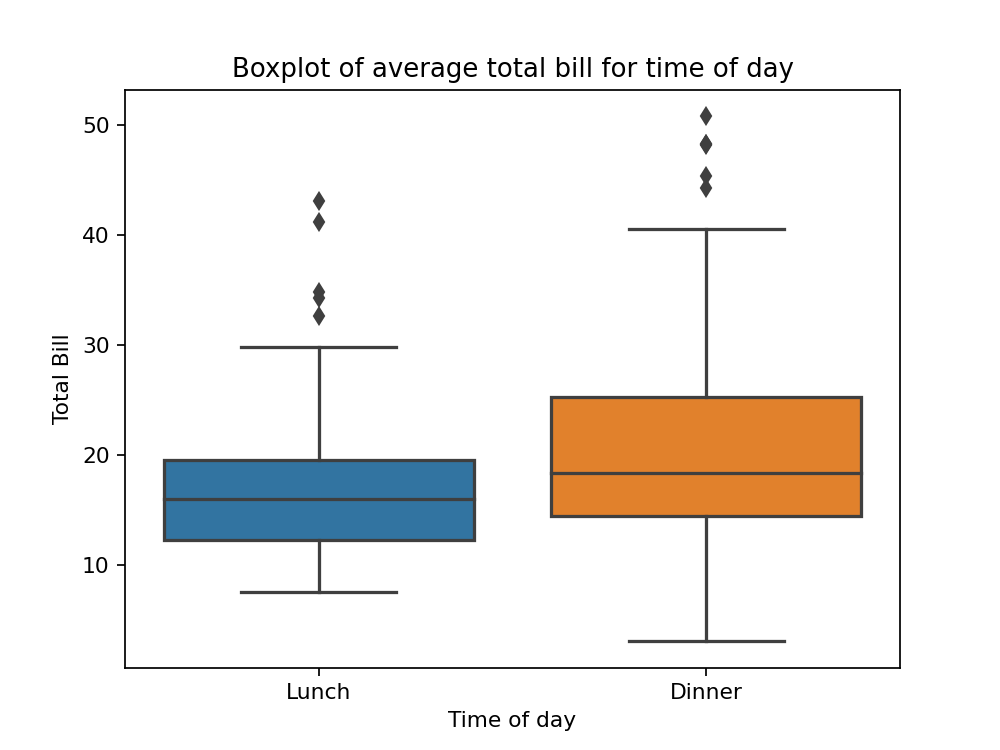

Text(0, 0.5, 'Total Bill')

In [43]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

<IPython.core.display.Javascript object>


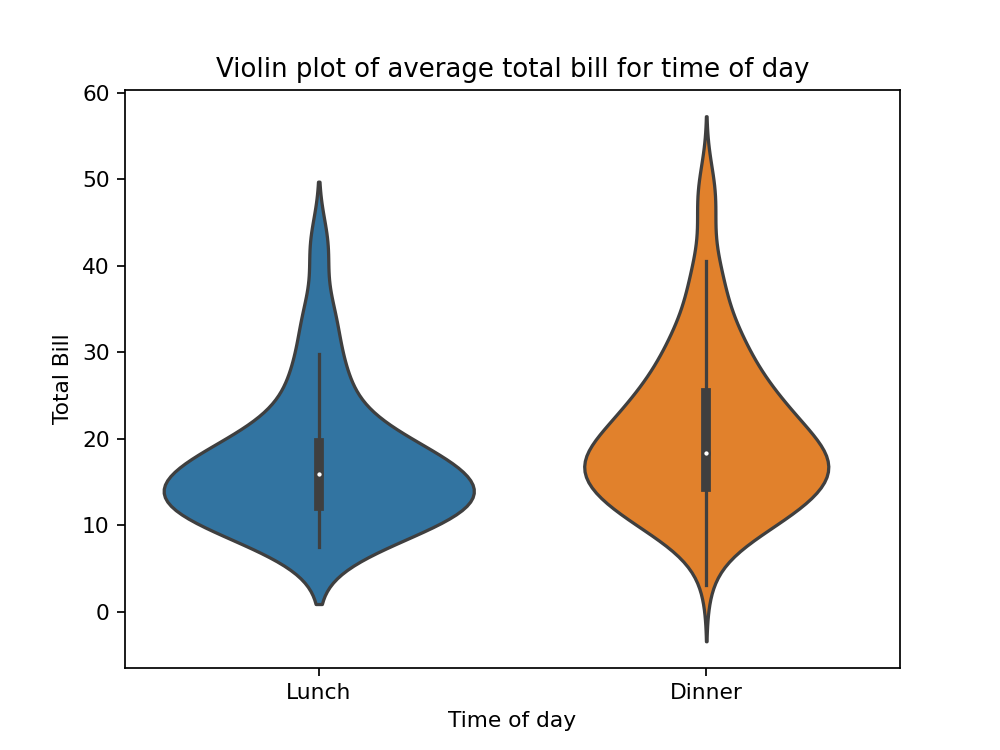

Text(0, 0.5, 'Total Bill')

In [44]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

<IPython.core.display.Javascript object>


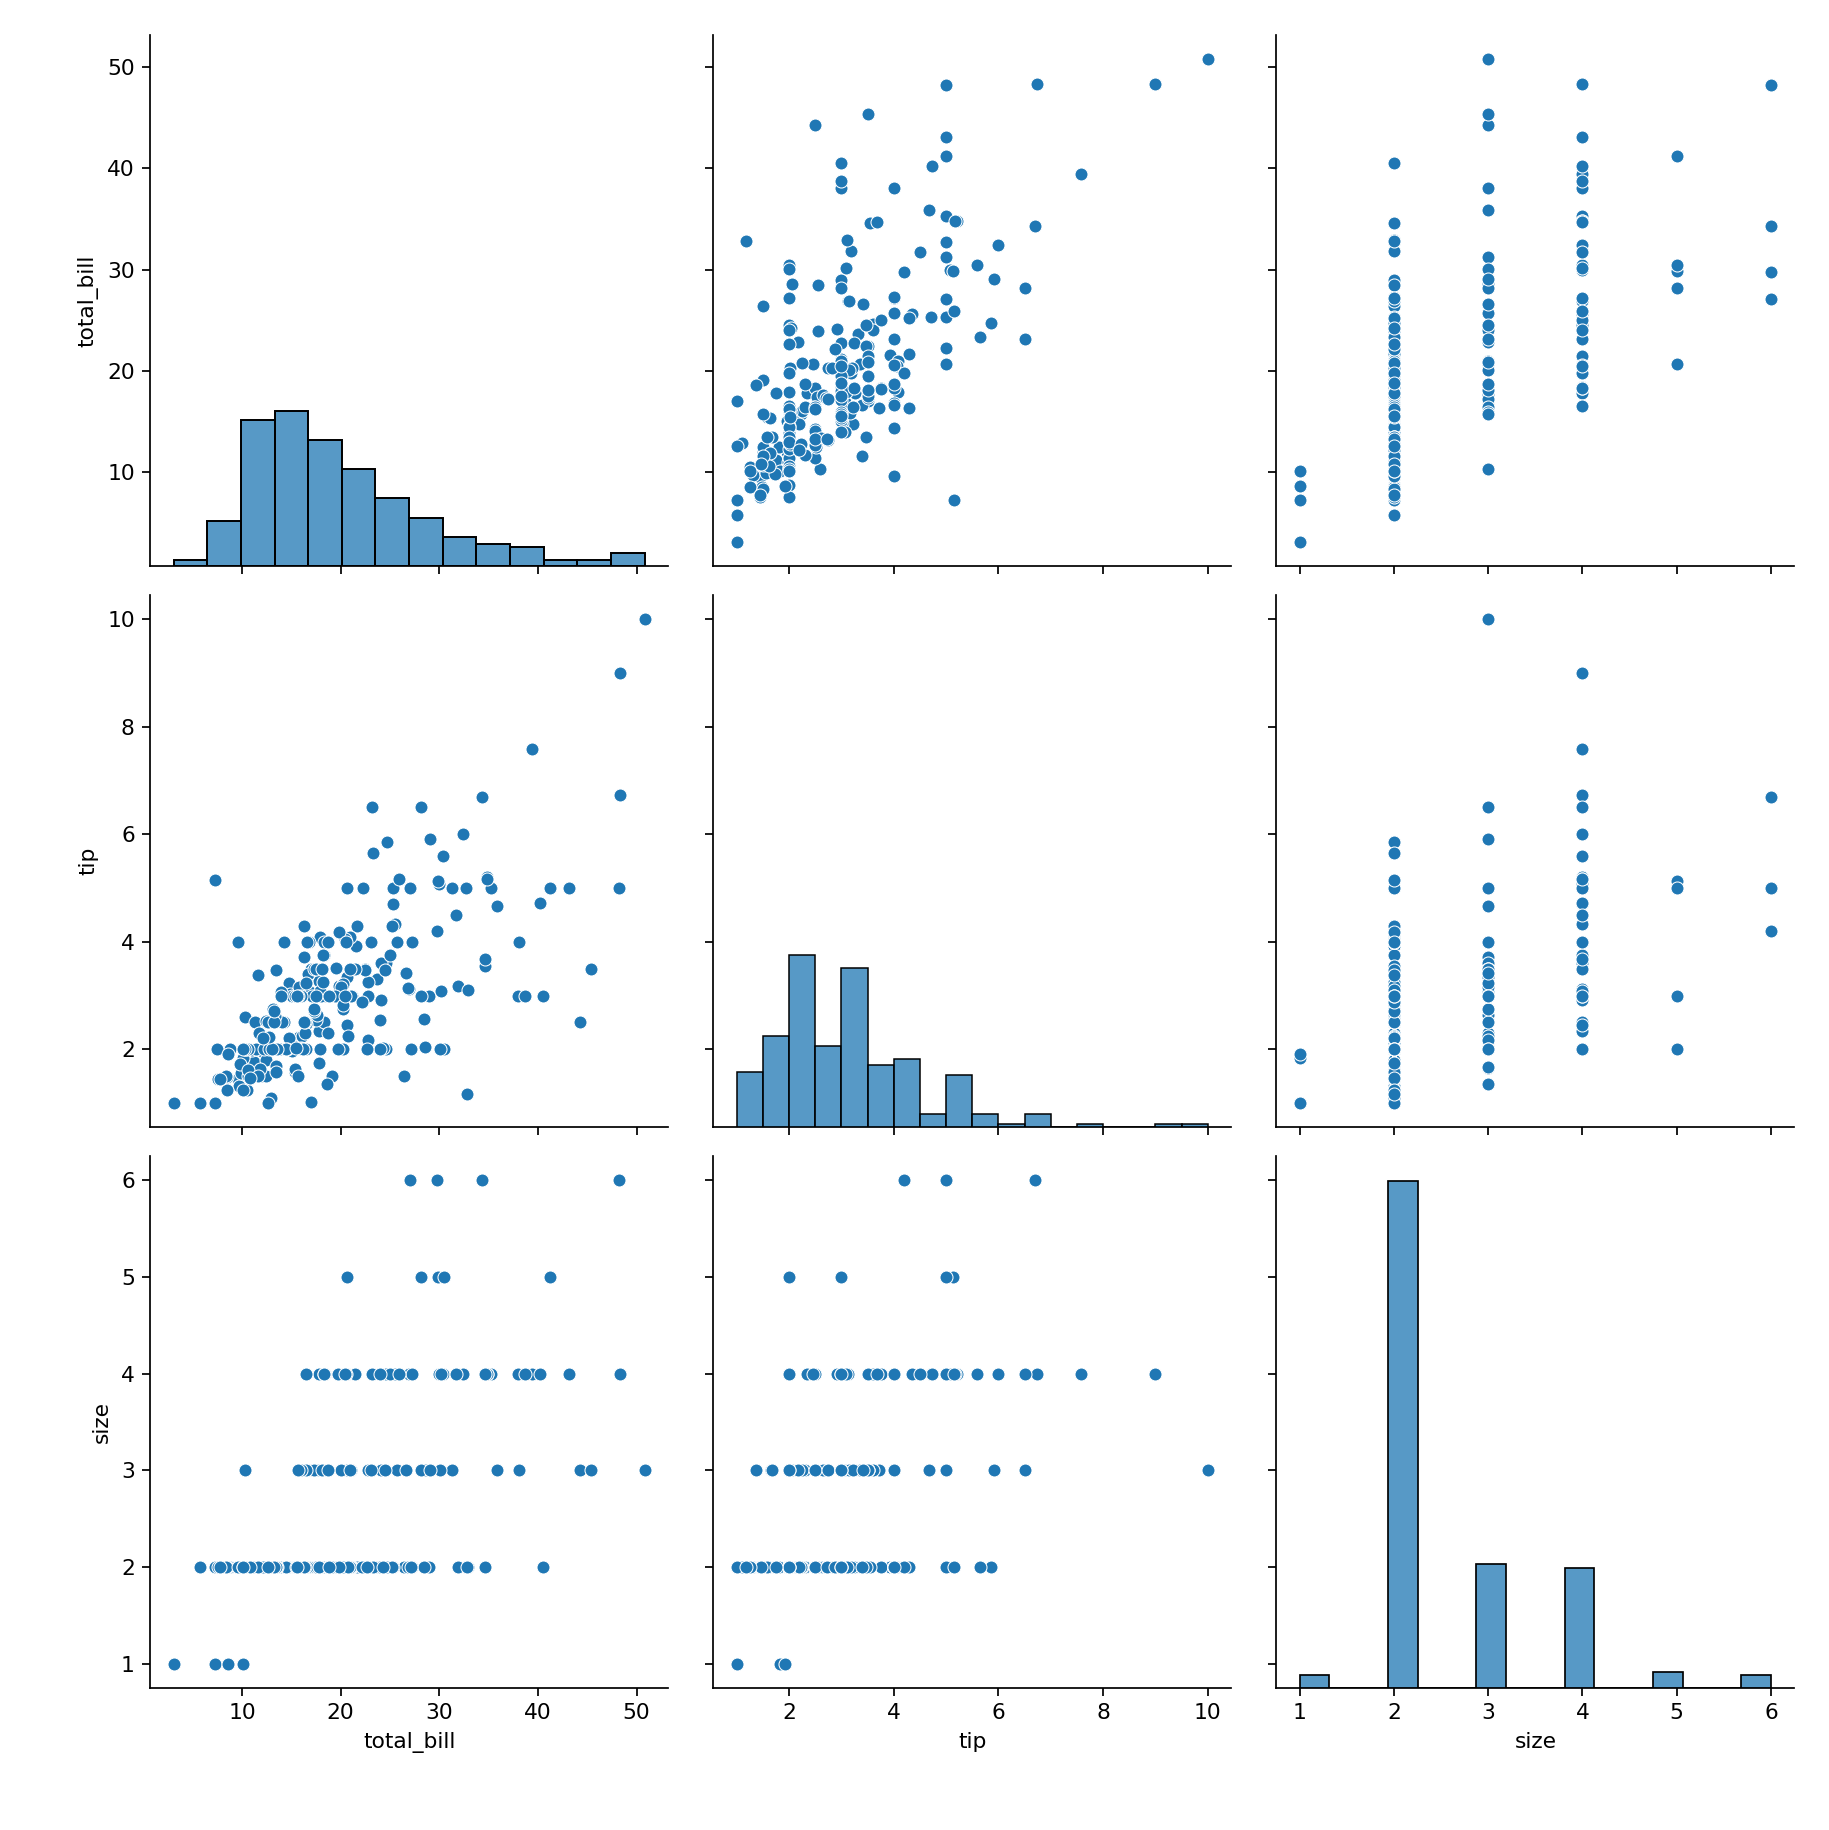

In [45]:
fig=sns.pairplot(tips)

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<IPython.core.display.Javascript object>


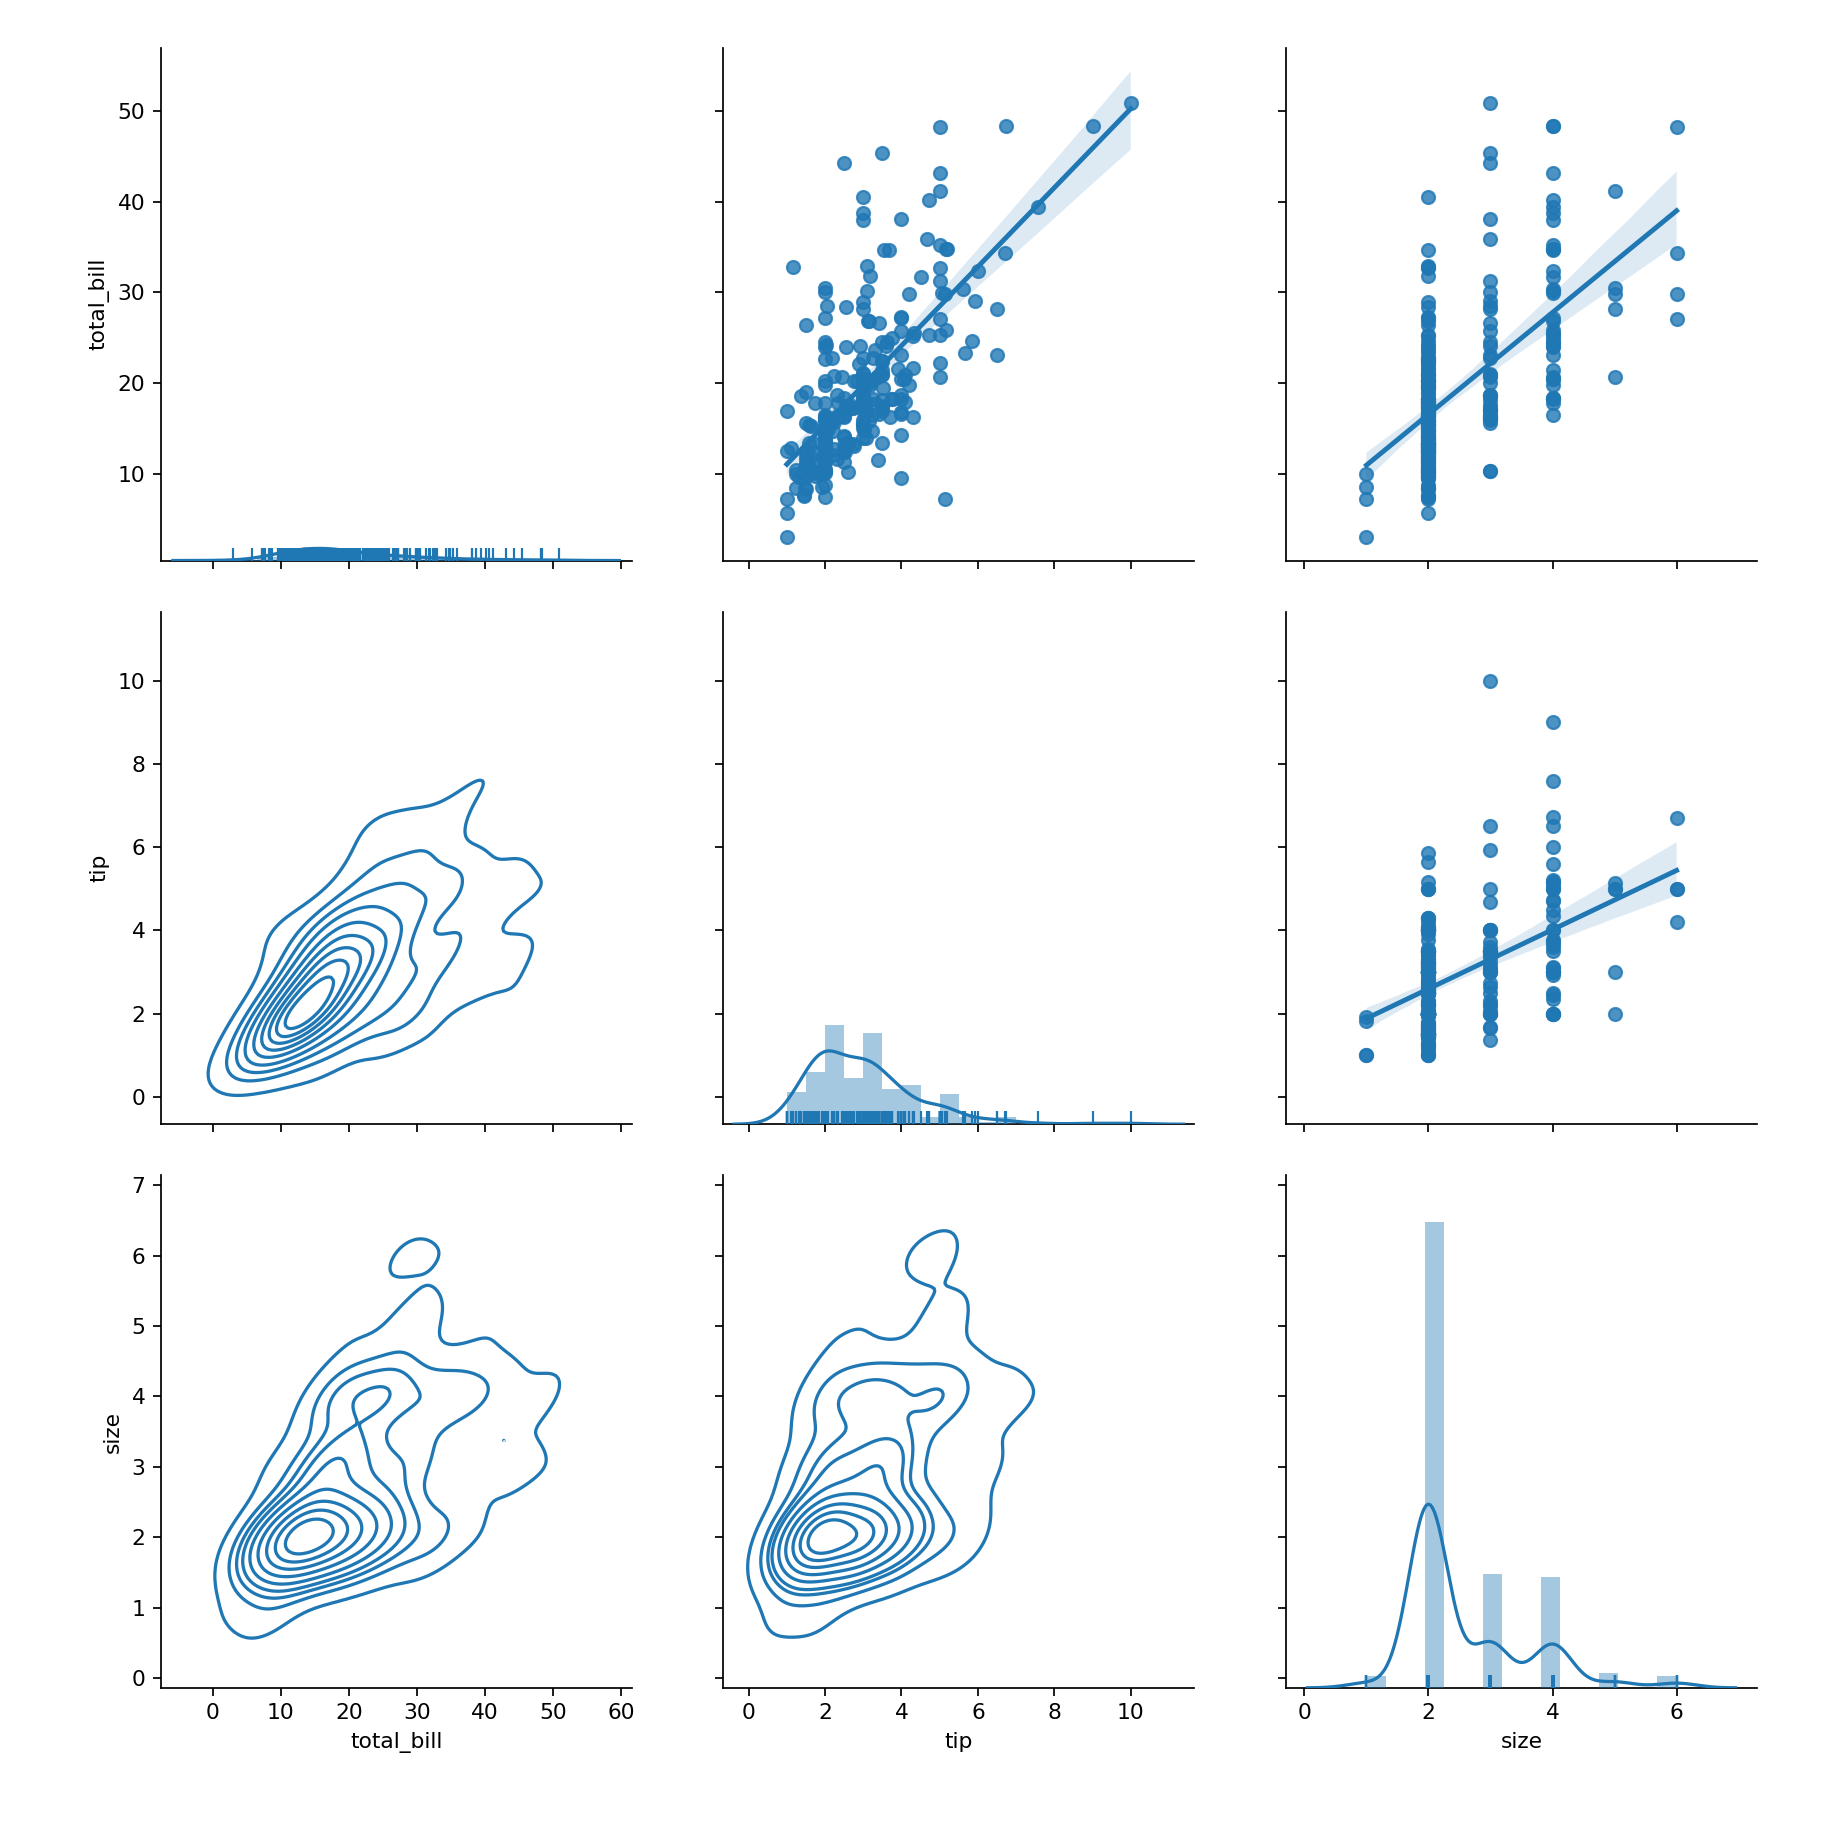

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\minji

In [49]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

<IPython.core.display.Javascript object>


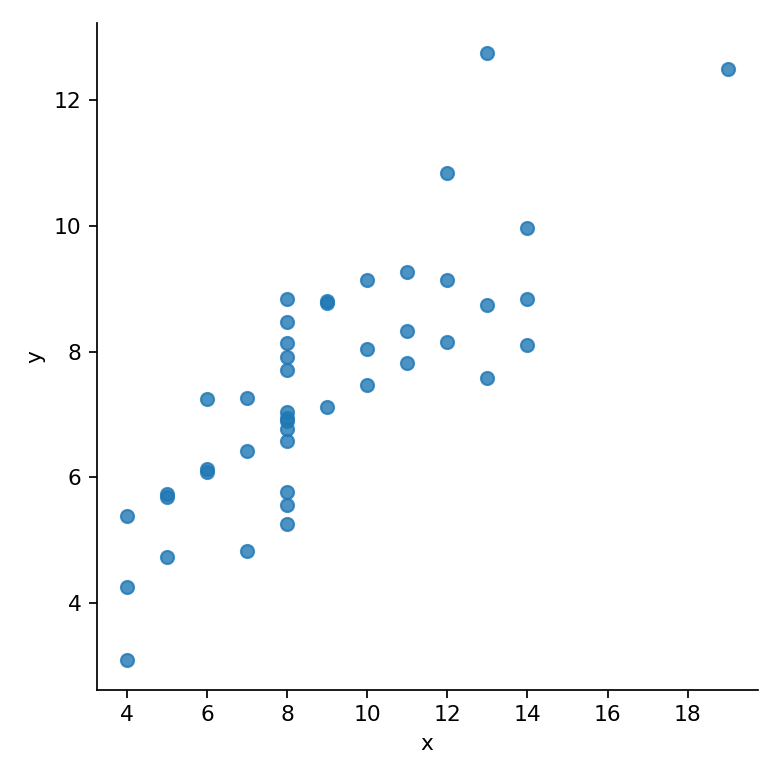

In [50]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

<IPython.core.display.Javascript object>


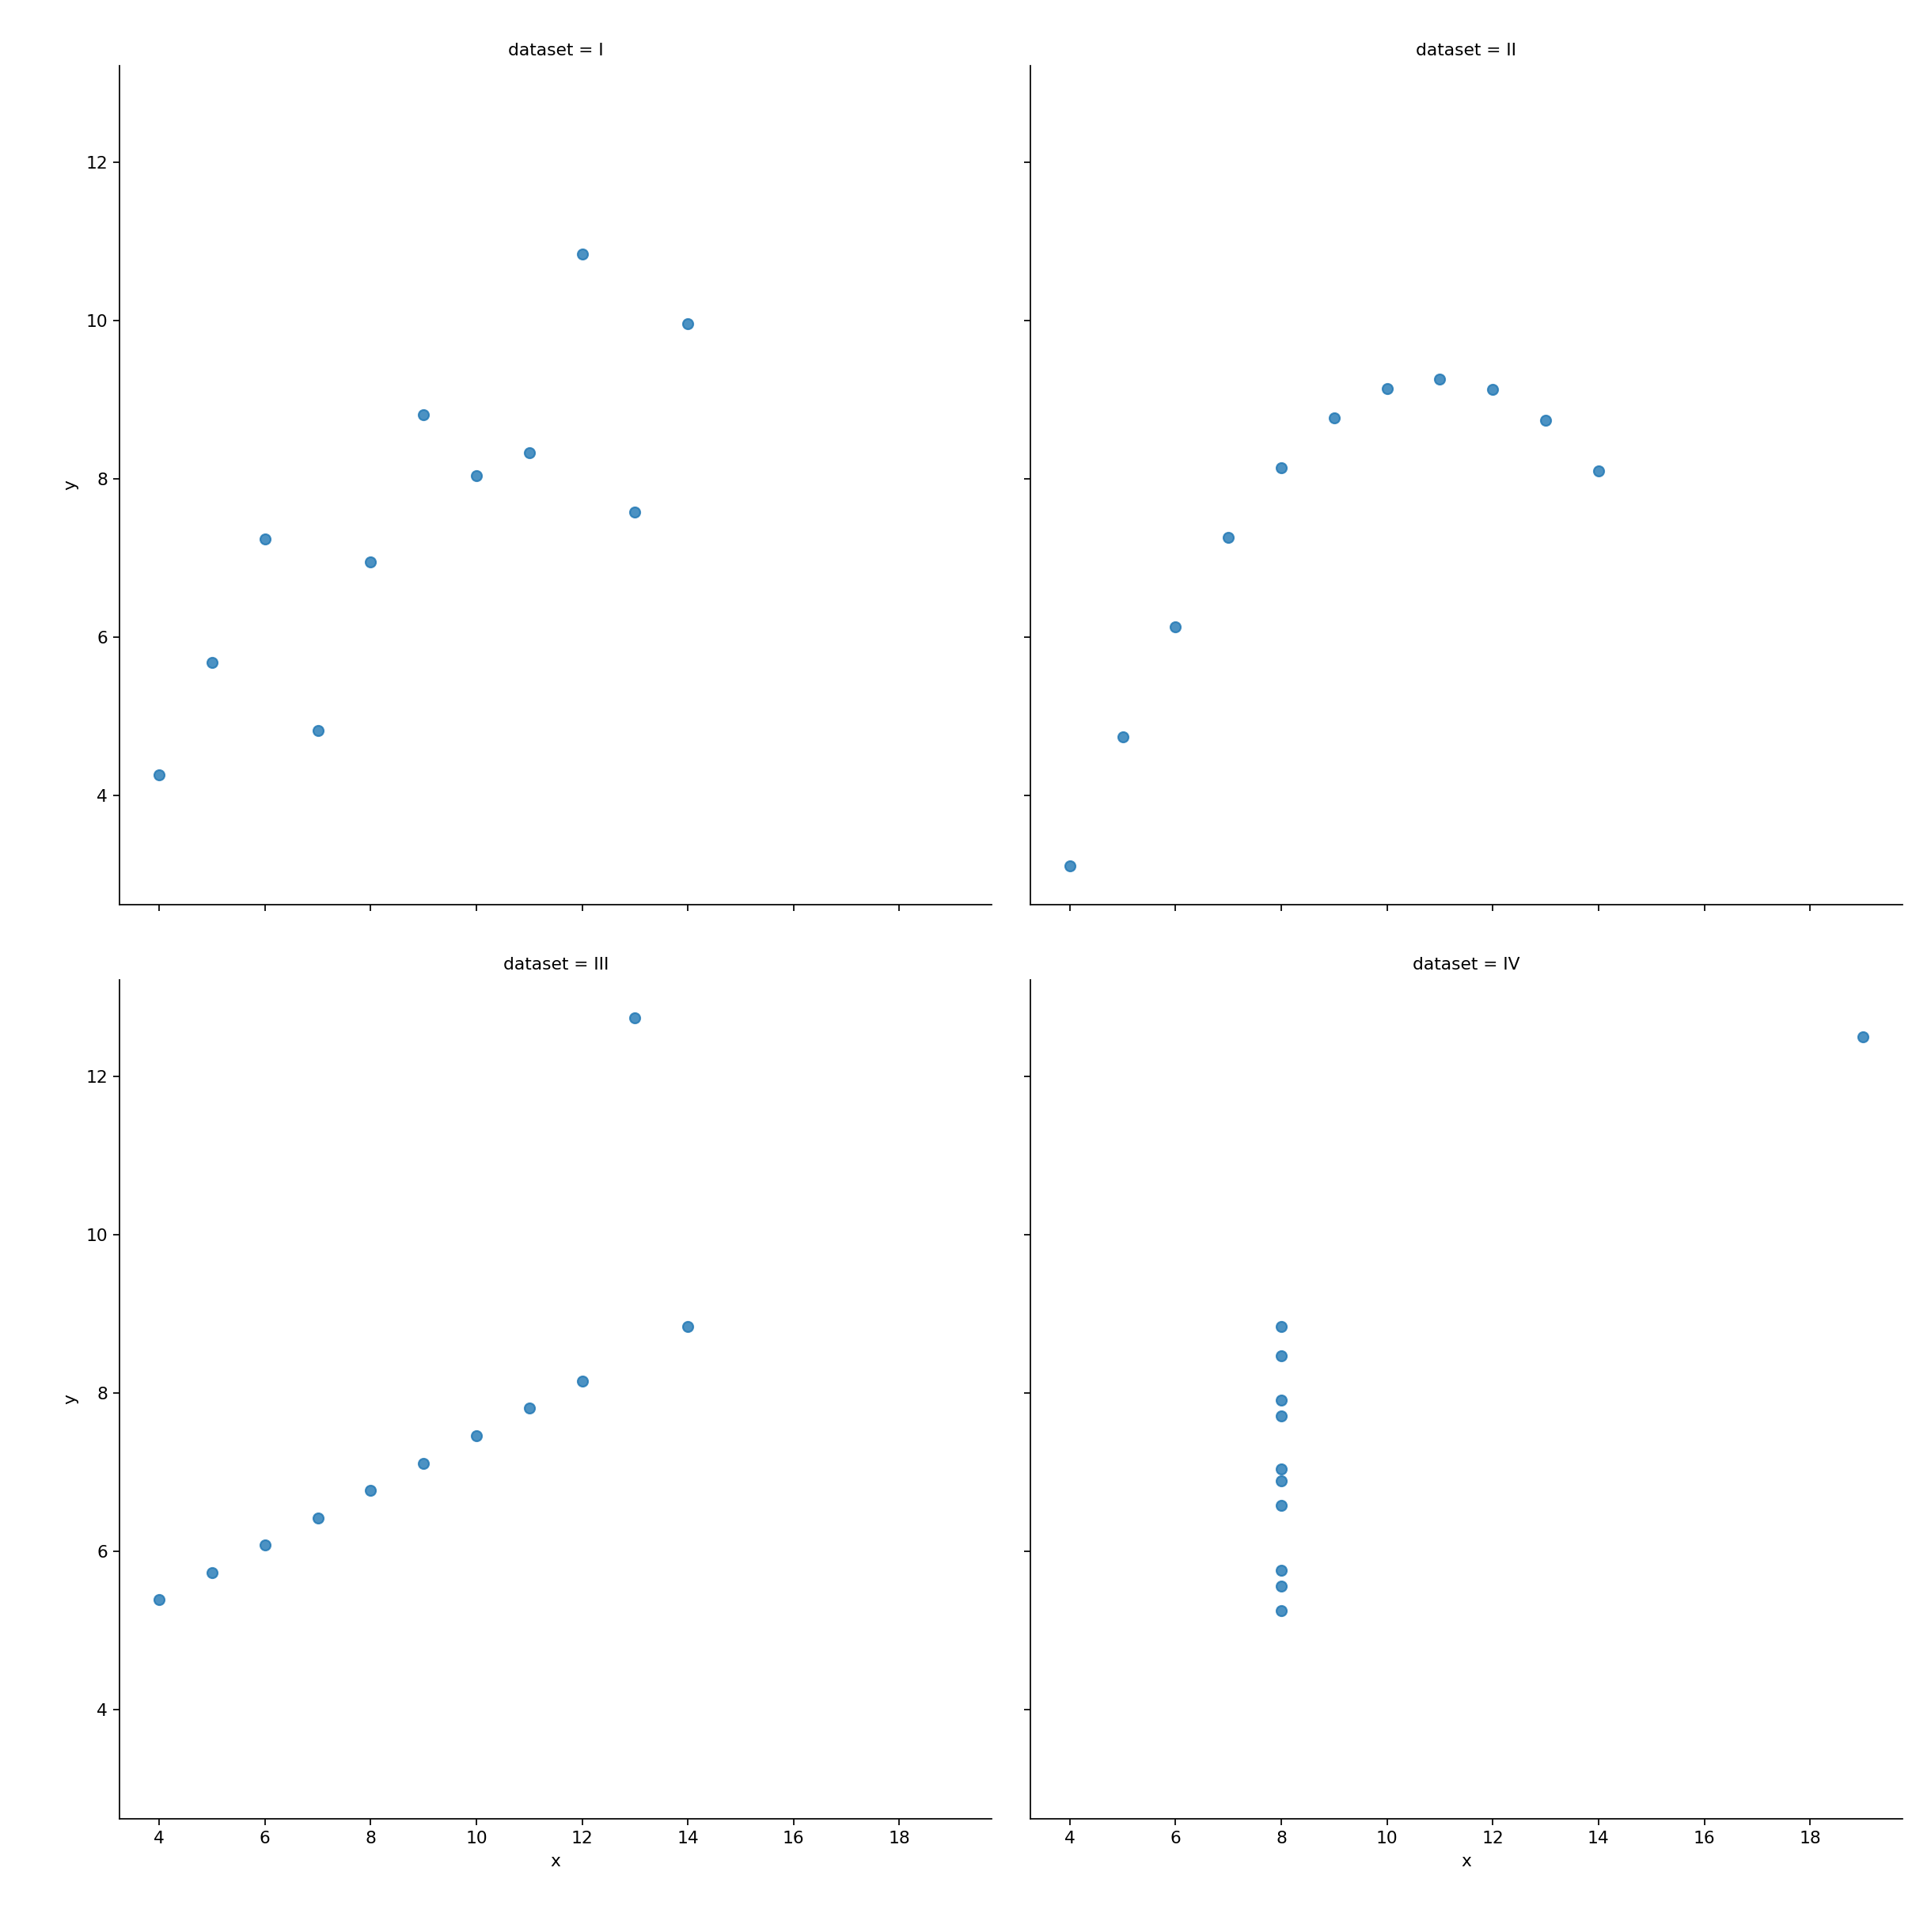

In [51]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)

## 04-4 데이터프레임과 시리즈로 그래프 그리기

<IPython.core.display.Javascript object>


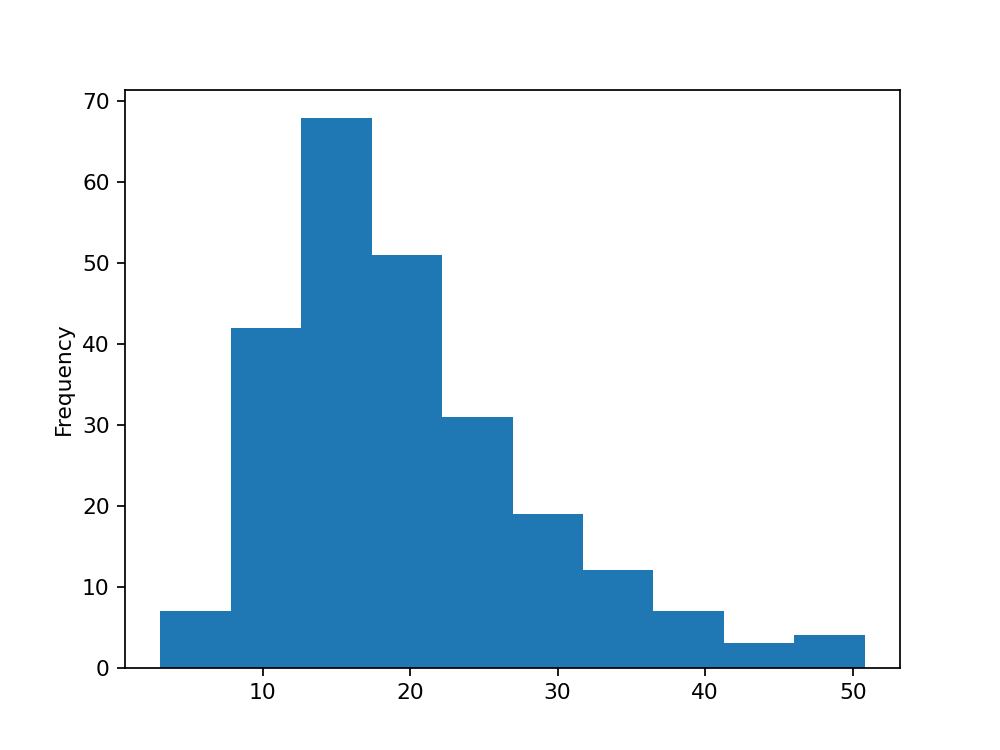

In [52]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

<IPython.core.display.Javascript object>


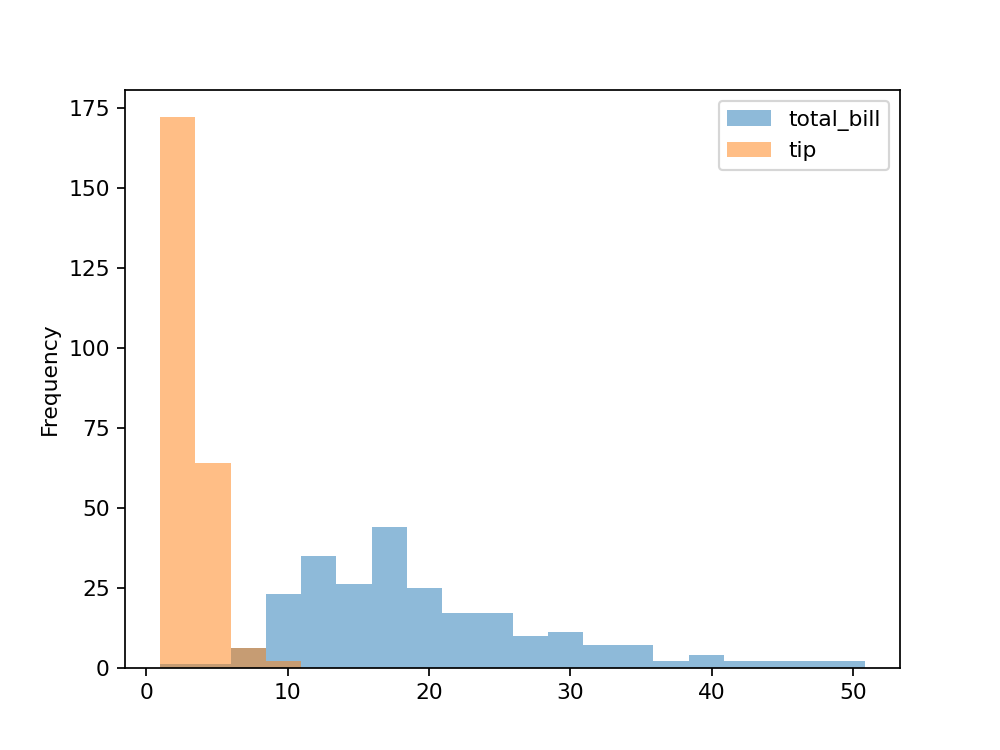

In [54]:
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)